<a href="https://colab.research.google.com/github/nhrishi/1.1.0-experimental_bin/blob/master/TradingIntel_v0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas_ta
!pip install fyers_apiv3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=b592bfb9c15c57093659932e47afe137c05b5bb70ed50b36f0555c501b896b16
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.8/171.8 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 41.9 MB/s eta 0:00:00
     ━━━━━━

In [1]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.activations import relu, tanh, sigmoid

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import json as json

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

#pip install fyers_apiv3

In [3]:
from fyers_apiv3 import fyersModel

client_id = "Q9Y3IP8H5W-100"
#access_token = "eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE3MTcwNzk5MzEsImV4cCI6MTcxNzExNTQ1MSwibmJmIjoxNzE3MDc5OTMxLCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbVdJOTdrQ19seDQzZEM4S1FhMGlRQ3pFNjg1Ti1rYlZiN3ROQ3E2QU1ubU95eU9kcUFaQms2ZzJNalhFQXFQWkpYeS1fMnJlSXhycWF4eWw4RklwcFNNc3BmclNhdHhMSHB6Z1p5MERIRV94Qk1Qaz0iLCJkaXNwbGF5X25hbWUiOiJIUklTSElLRVNIIERFRVBBSyBOQVNISUtLQVIiLCJvbXMiOiJLMSIsImhzbV9rZXkiOiIzMDI1Y2IzMjkxYWEzYTcyMzM3MWIyYzkxOGU4YTc5ZDFkZDk5ODlmMmI3NjcwY2ViZGZkNjQyNiIsImZ5X2lkIjoiWUgwMTc3NSIsImFwcFR5cGUiOjEwMCwicG9hX2ZsYWciOiJOIn0.6iCpNueqfkemVbnVBfC_N6vVbMoZM2mxiDCO9mnfCzA"
#access_token = "eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE3MTc4NTEzMzcsImV4cCI6MTcxNzg5MzAzNywibmJmIjoxNzE3ODUxMzM3LCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbVpGVEpqSm9MNjNfNU9kWlp4RFczV2licTdyd2RmVGkycWZKdTFJWEoxa1FodTRRb0V2QTRXT2t2N09rRnFwRmpFR1Y3ZXR3UFlmVlBaTTNLSW54al90UGNROV9NQ1lYekViSXZhbHk5OFZnd0ZpOD0iLCJkaXNwbGF5X25hbWUiOiJIUklTSElLRVNIIERFRVBBSyBOQVNISUtLQVIiLCJvbXMiOiJLMSIsImhzbV9rZXkiOiIzMDI1Y2IzMjkxYWEzYTcyMzM3MWIyYzkxOGU4YTc5ZDFkZDk5ODlmMmI3NjcwY2ViZGZkNjQyNiIsImZ5X2lkIjoiWUgwMTc3NSIsImFwcFR5cGUiOjEwMCwicG9hX2ZsYWciOiJOIn0.w7Rwd1esuLu8SZ_jekW3SmOoovH_72XcJO2GX-lmAX0"
access_token = "eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE3MTc5MDU4OTIsImV4cCI6MTcxNzk3OTQ1MiwibmJmIjoxNzE3OTA1ODkyLCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbVpTbms3VGE2ektjb2ZuQlVMRjFQV05KbGI3UkJYZGVtaWlMV3pIcDlQdnRDdVJjYWRRUExSeWNZLTZBb2pFazRvZDhHNTNnVk9iWS1rX0diYk5JTVQ5LTZMcnBkODRiTjVDQ2RPTktvWWxJd0tzaz0iLCJkaXNwbGF5X25hbWUiOiJIUklTSElLRVNIIERFRVBBSyBOQVNISUtLQVIiLCJvbXMiOiJLMSIsImhzbV9rZXkiOiIzMDI1Y2IzMjkxYWEzYTcyMzM3MWIyYzkxOGU4YTc5ZDFkZDk5ODlmMmI3NjcwY2ViZGZkNjQyNiIsImZ5X2lkIjoiWUgwMTc3NSIsImFwcFR5cGUiOjEwMCwicG9hX2ZsYWciOiJOIn0.xguoXythWsSY5p8GrebQbkdp8qXVRMZa0m0agds9YJc"
# Initialize the FyersModel instance with your client_id, access_token, and enable async mode
fyers = fyersModel.FyersModel(client_id=client_id, is_async=False, token=access_token, log_path="")

#yyyy-mm-dd
#Daily data Extraction
# daily_data = {
#     "symbol":"NSE:SBIN-EQ",
#     "resolution":"D",
#     "date_format":"1",
#     "range_from":"2023-05-30",
#     "range_to":"2024-05-30",
#     "cont_flag":"1"
# }
daily_data = {
    "symbol":"MCX:CRUDEOIL24JUNFUT",
    "resolution":"D",
    "date_format":"1",
    "range_from":"2023-06-07",
    "range_to":"2024-06-07",
    "cont_flag":"1"
}


response = fyers.history(data=daily_data)
print(response)
daily_data_json = json.dumps(response)
daily_data_df = json.loads(daily_data_json)
print(daily_data_df['candles'])
pricing_daily_data = daily_data_df['candles']
daily_df = pd.DataFrame(pricing_daily_data)
daily_df.columns = ["epoch", "open", "high", "low", "close", "volume"]


# #hourly data Extraction
# hourly_data = {
#     "symbol":"NSE:SBIN-EQ",
#     "resolution":"60",
#     "date_format":"1",
#     "range_from":"2024-03-01",
#     "range_to":"2024-05-29",
#     "cont_flag":"1"
# }

# response = fyers.history(data=hourly_data)
# print(response)
# hourly_data_json = json.dumps(response)
# hourly_data_df = json.loads(hourly_data_json)
# print(hourly_data_df['candles'])
# pricing_hourly_data = hourly_data_df['candles']
# hourly_df = pd.DataFrame(pricing_hourly_data)
# hourly_df.columns = ["epoch", "open", "high", "low", "close", "volume"]


import datetime
daily_df['date'] = pd.to_datetime(daily_df['epoch'], unit='s').dt.strftime('%Y-%m-%d')
print(daily_df)

# hourly_df['date'] = pd.to_datetime(hourly_df['epoch'], unit='s').dt.strftime('%Y-%m-%d')
# print(hourly_df)


{'candles': [[1686096000, 5918, 6046, 5871, 6004, 44920], [1686182400, 5986, 6053, 5714, 5903, 99890], [1686268800, 5863, 5926, 5809, 5824, 44618], [1686528000, 5750, 5750, 5524, 5569, 67050], [1686614400, 5575, 5754, 5549, 5729, 50781], [1686700800, 5722, 5789, 5630, 5664, 32357], [1686787200, 5609, 5814, 5592, 5796, 12902], [1686873600, 5814, 5884, 5775, 5877, 22585], [1687132800, 5834, 5938, 5830, 5865, 17072], [1687219200, 5853, 5955, 5747, 5821, 35024], [1687305600, 5835, 5975, 5827, 5953, 28408], [1687392000, 5940, 5966, 5675, 5705, 47042], [1687478400, 5678, 5690, 5546, 5675, 36092], [1687737600, 5686, 5760, 5654, 5737, 31085], [1687824000, 5744, 5766, 5582, 5617, 52225], [1687910400, 5615, 5737, 5529, 5726, 54201], [1687996800, 5750, 5809, 5677, 5738, 24075], [1688083200, 5752, 5841, 5728, 5799, 45545], [1688342400, 5809, 5890, 5734, 5753, 42100], [1688428800, 5760, 5859, 5748, 5850, 23413], [1688515200, 5833, 5940, 5795, 5932, 42387], [1688601600, 5920, 5973, 5822, 5941, 43210

In [ ]:
#hourly_df.set_index('date', inplace=True)
#daily_df.set_index('date', inplace=True)

In [4]:
# Moving Average 20
#daily_df['MA_20'] = daily_df['close'].rolling(window=20).mean()
#daily_df.dropna(inplace=True)
#print(daily_df)

daily_df['DAILY_RSI']=ta.rsi(daily_df.close, length=15)
daily_df['DAILY_EMA5']=ta.ema(daily_df.close, length=5)
daily_df['DAILY_EMA12']=ta.ema(daily_df.close, length=12)
daily_df['DAILY_EMA13']=ta.ema(daily_df.close, length=13)
daily_df['DAILY_EMA26']=ta.ema(daily_df.close, length=26)
daily_df['DAILY_EMA50']=ta.ema(daily_df.close, length=50)
# daily_df['MACD_TA'], daily_df['histogram'], daily_df['signal']=ta.macd(daily_df.close, fast=12, slow=26, signal=9)


####### Daily MACD calculations ######
# # Calculate the 5-period EMA Daily
# daily_df['DAILY_EMA5'] = daily_df['close'].ewm(span=5, adjust=False).mean()

# # Calculate the 13-period EMA Daily
# daily_df['DAILY_EMA13'] = daily_df['close'].ewm(span=13, adjust=False).mean()

# # Calculate the 12-period EMA Daily
# daily_df['DAILY_EMA12'] = daily_df['close'].ewm(span=12, adjust=False).mean()

# # Calculate the 26-period EMA Daily
# daily_df['DAILY_EMA26'] = daily_df['close'].ewm(span=26, adjust=False).mean()

# # Calculate the 50-period EMA Daily
# daily_df['DAILY_EMA50'] = daily_df['close'].ewm(span=50, adjust=False).mean()

# # Calculate the 100-period EMA Daily
# daily_df['DAILY_EMA100'] = daily_df['close'].ewm(span=100, adjust=False).mean()

# Calculate MACD (the difference between 12-period EMA and 26-period EMA)
daily_df['DAILY_MACD'] = daily_df['DAILY_EMA12'] - daily_df['DAILY_EMA26']

# Calculate the 9-period EMA of MACD (Signal Line)
daily_df['DAILY_SIGNAL'] = daily_df['DAILY_MACD'].ewm(span=9, adjust=False).mean()

## Target calculation
daily_df['Target'] = daily_df['close']-daily_df.open
daily_df['Target'] = daily_df['Target'].shift(-1)

daily_df['TargetClass'] = [1 if daily_df.Target[i]>0 else 0 for i in range(len(daily_df))]

daily_df['TargetNextClose'] = daily_df['close'].shift(-1)

##ADX
adx_df = daily_df.ta.adx(high=daily_df['high'], low=daily_df['low'], close=daily_df['close']);
daily_df = pd.concat([daily_df, adx_df], axis=1)

##BB
bb_df = ta.bbands(daily_df.close, length=20, std=2).iloc[:, :3]
daily_df = pd.concat([daily_df, bb_df], axis=1)


#### Drop rows with NaN values created by indicators calculation

daily_df.dropna(inplace=True)
# hourly_df.dropna(inplace=True)
# daily_df.reset_index(inplace = True)

print(daily_df.shape)
# print(hourly_df.shape)

(209, 24)


In [5]:
# print(daily_df.shape)
# print(len(daily_df))
print(daily_df.shape)

# print(hourly_df.shape)

(209, 24)


In [6]:
features = ['close', 'DAILY_MACD', 'DAILY_RSI', 'DAILY_SIGNAL', 'volume', 'DAILY_EMA5', 'DAILY_EMA13', 'DAILY_EMA26', 'DAILY_EMA50', 'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'Target', 'TargetClass', 'TargetNextClose', 'ADX_14']
# Normalize features
scaler = MinMaxScaler()
#scaled_data = scaler.fit_transform(combined_df[['close', 'DAILY_MACD', 'DAILY_RSI', 'DAILY_SIGNAL', 'volume', 'HOURLY_RSI_max', 'HOURLY_RSI_min', 'DAILY_EMA5', 'DAILY_EMA13', 'DAILY_EMA26', 'HOURLY_EMA5_mean', 'HOURLY_EMA13_mean', 'HOURLY_EMA26_mean' ]])
scaled_data = scaler.fit_transform(daily_df[features])

#print(scaled_data)

In [7]:
print(scaled_data.shape)

(209, 16)


In [8]:
# Create sequences for LSTM model
def create_sequences(data, seq_length, pred_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length - pred_length + 1):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length:i + seq_length + pred_length, 0])  # Assuming 'Close' is the first column
    return np.array(sequences), np.array(labels)


# If the input data is not a 2D array, reshape it
if len(scaled_data.shape) != 2:
    scaled_data = scaled_data.reshape(-1, 1)

SEQ_LENGTH = 5  # 60 days sequence
PRED_LENGTH = 5  # Prediction length

X, y = create_sequences(scaled_data, SEQ_LENGTH, PRED_LENGTH)

# Split into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 5, 16)
(160, 5)
(40, 5, 16)
(40, 5)


In [ ]:
# if len(X_train.shape) == 3:
#     X_train = np.expand_dims(X_train, axis=2)

In [10]:
model = Sequential([
    LSTM(150, activation='tanh', return_sequences=True, input_shape=(SEQ_LENGTH, X_train.shape[2])),
    Dropout(0.2),
    LSTM(150, activation='tanh', return_sequences=True),
    Dropout(0.2),
    LSTM(150, activation='tanh'),
    Dropout(0.2),
    Dense(5, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error')
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


history = model.fit(X_train, y_train, epochs=75, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/75
5/5 [==============================] - 8s 477ms/step - loss: 0.1717 - val_loss: 0.0189
Epoch 2/75
5/5 [==============================] - 0s 44ms/step - loss: 0.0390 - val_loss: 0.0126
Epoch 3/75
5/5 [==============================] - 0s 42ms/step - loss: 0.0248 - val_loss: 0.0138
Epoch 4/75
5/5 [==============================] - 0s 47ms/step - loss: 0.0254 - val_loss: 0.0110
Epoch 5/75
5/5 [==============================] - 0s 62ms/step - loss: 0.0207 - val_loss: 0.0098
Epoch 6/75
5/5 [==============================] - 0s 46ms/step - loss: 0.0179 - val_loss: 0.0052
Epoch 7/75
5/5 [==============================] - 0s 41ms/step - loss: 0.0158 - val_loss: 0.0110
Epoch 8/75
5/5 [==============================] - 0s 51ms/step - loss: 0.0146 - val_loss: 0.0077
Epoch 9/75
5/5 [==============================] - 0s 48ms/step - loss: 0.0137 - val_loss: 0.0051
Epoch 10/75
5/5 [==============================] - 0s 45ms/step - loss: 0.0142 - val_loss: 0.0095
Epoch 11/75
5/5 [===========

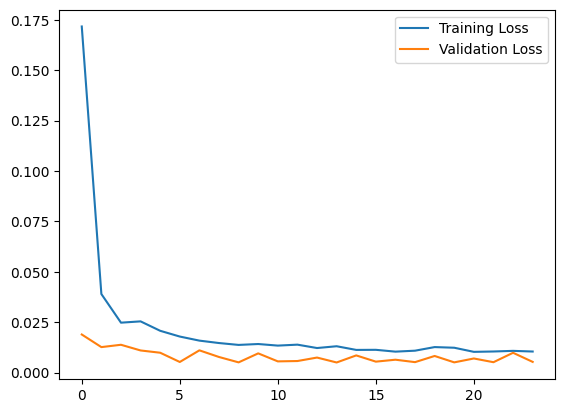

X_test (40, 5, 16)
2/2 [==============================] - 0s 19ms/step


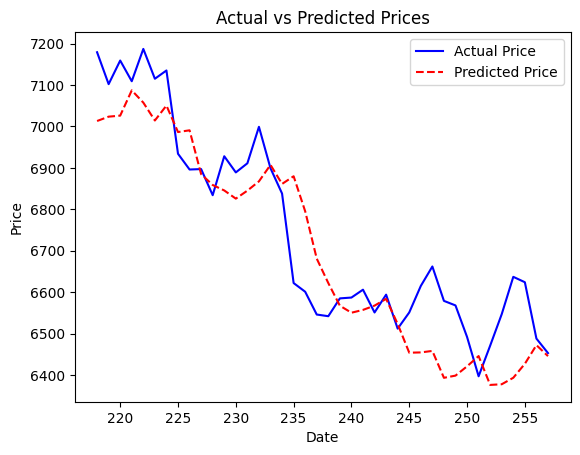

In [19]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

print("X_test", X_test.shape)

# Make predictions
test_predictions = model.predict(X_test)

test_predictions_reshaped = np.zeros((test_predictions.shape[0], scaled_data.shape[1]))
test_predictions_reshaped[:, 0] = test_predictions[:, 0]  # Only 'Close' prices are predicted
test_predictions_inversed = scaler.inverse_transform(test_predictions_reshaped)[:, 0]
# Plot predicted vs actual prices
plt.plot(daily_df.index[-len(y_test):], scaler.inverse_transform(np.concatenate([y_test, np.zeros((y_test.shape[0], scaled_data.shape[1] - y_test.shape[1]))], axis=1))[:, 0], color='blue', label='Actual Price')

plt.plot(daily_df.index[-len(test_predictions):], test_predictions_inversed, color='red', linestyle='--', label='Predicted Price')

# Adding titles and labels
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# print("predicted_prices:", predicted_prices.shape, predicted_prices)
# # Plot predicted vs actual prices
# #plt.plot(daily_df.index[-len(y_test):], scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], X_test.shape[2] - 1))], axis=1))[:, 0], label='Actual Price')

# test_predictions_reshaped = predicted_prices.reshape(-1, 5)
# # test_predictions_reshaped = test_predictions_reshaped.reshape(-1, 16)

# test_predictions_inversed = scaler.inverse_transform(test_predictions_reshaped)

# plt.plot(daily_df.index[-len(y_test):], scaler.inverse_transform(np.concatenate([y_test, np.zeros((y_test.shape[0], scaled_data.shape[1] - y_test.shape[1]))], axis=1))[:, 0], color='blue', label='Actual Price')
# plt.plot(daily_df.index[-len(predicted_prices):], test_predictions_reshaped, color='red', linestyle='--', label='Predicted Price')

# #plt.plot(daily_df.index[-len(y_test):], predicted_prices, label='Predicted Price')
# plt.legend()
# plt.show()

# print(predicted_prices)

In [20]:
recent_data = scaled_data[-SEQ_LENGTH:]
print("recent_data:", recent_data.shape)

recent_data: (5, 16)


In [70]:
# Function to make predictions iteratively
def predict_next_days(model, recent_data, num_days):
    predictions = []
    current_sequence = recent_data
    print("current:", current_sequence.shape)

    for _ in range(num_days):
        # Reshape the sequence to fit the model input shape
        #current_sequence_reshaped = np.reshape(current_sequence, (1, SEQ_LENGTH, current_sequence.shape[1]))
        current_sequence_reshaped = np.reshape(current_sequence, (1, current_sequence.shape[0], current_sequence.shape[1]))

        print("current_sequence_reshaped", current_sequence_reshaped.shape, current_sequence_reshaped)

        # Predict the next day's value
        next_prediction = model.predict(current_sequence_reshaped)[0]
        print("predict:", next_prediction.shape)

        # Reshape the next prediction to match the first element of current_sequence
        next_prediction_reshaped = np.zeros((current_sequence.shape[1],))
        next_prediction_reshaped[0] = next_prediction[0]  # Only the 'Close' price is predicted
        next_prediction_reshaped = next_prediction_reshaped.reshape(1, -1)  # Reshape for concatenation


        #next_prediction = next_prediction.reshape(1, current_sequence.shape[0])
        #next_prediction_reshaped = np.reshape(next_prediction, (1, -1))
        print("next_prediction", next_prediction_reshaped.shape)
        # Append the prediction to the list of predictions
        predictions.append(next_prediction)  # We are interested only in the 'Close' price
        print("predictions:", predictions)
        print("next:", next_prediction_reshaped.shape, next_prediction_reshaped)
        print("curr:", current_sequence[1:].shape, current_sequence[1:])
        # Update the current sequence
        next_input = np.append(current_sequence[1:], next_prediction_reshaped, axis=0)

        current_sequence = next_input

    return np.array(predictions)

# Predict the next 5 days
predicted_next_5_days = predict_next_days(model, recent_data, 5)
print("predicted_next_5_days:", predicted_next_5_days)
# Reshape the predicted values and create dummy columns to inverse transform correctly


current: (5, 16)
current_sequence_reshaped (1, 5, 16) [[[0.3546988  0.33580681 0.21588328 0.29868162 0.25579731 0.37832663
   0.35996643 0.43498117 0.52649303 0.5158888  0.37537391 0.2671268
   0.20426829 0.         0.22361446 0.43008069]
  [0.22361446 0.28481241 0.00865675 0.28989942 0.64725426 0.31475798
   0.32472301 0.40975989 0.50545952 0.45308524 0.36281739 0.30307095
   0.55945122 1.         0.21686747 0.47610411]
  [0.21686747 0.24468781 0.         0.27381389 0.33967729 0.26971932
   0.29316736 0.38558355 0.48462855 0.40463735 0.34827826 0.32236133
   0.64786585 1.         0.22795181 0.53327633]
  [0.22795181 0.2198347  0.03310761 0.25533385 0.31701624 0.24406282
   0.2683326  0.36455062 0.46563684 0.36987901 0.33446957 0.33032796
   0.73018293 1.         0.29349398 0.57788232]
  [0.29349398 0.2264641  0.2133607  0.24204668 0.33771788 0.25279423
   0.26013094 0.35307354 0.45343521 0.35803834 0.32473043 0.3242872
   0.56402439 1.         0.29204819 0.57099782]]]
1/1 [===========

Input : 25 16
predicted_next_5_days : (25, 1)
scaled_data : (209, 16)
predicted_next_5_days_new : (25, 16)
predicted_next_5_days_reshaped[:, 0] : (25,)
[5717. 5717. 5717. 5717. 5717. 5717. 5717. 5717. 5717. 5717. 5717. 5717.
 5717. 5717. 5717. 5717. 5717. 5717. 5717. 5717. 5717. 5717. 5717. 5717.
 5717.]
2/2 [==============================] - 0s 24ms/step


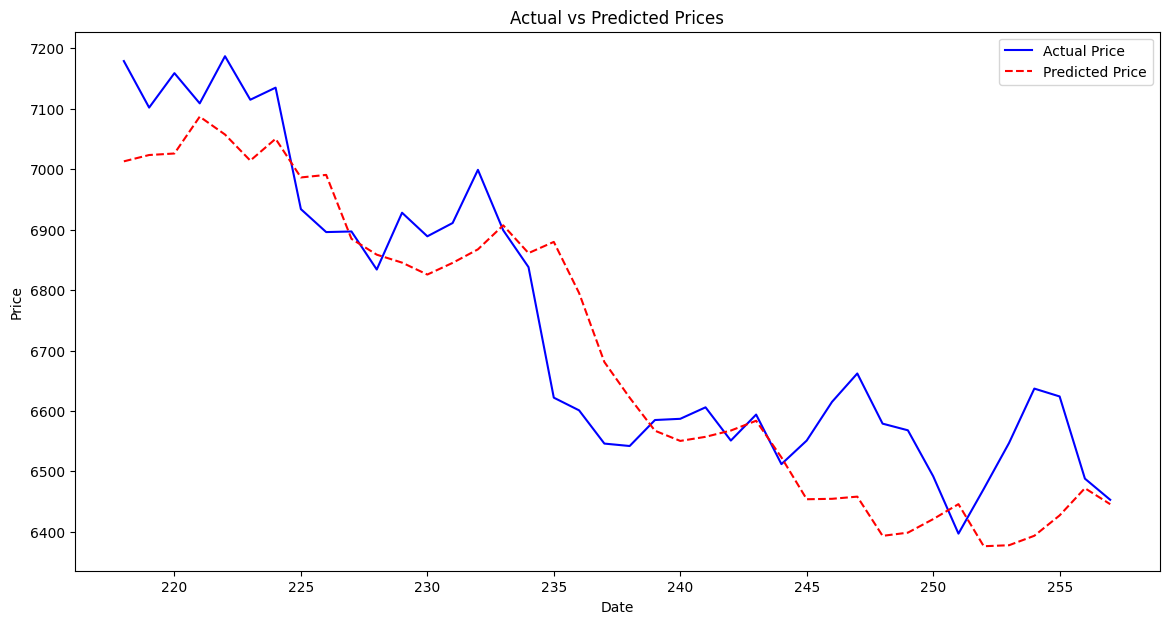

In [67]:
# print("Input :", predicted_next_5_days.shape[0], scaled_data.shape[1])

# print("predicted_next_5_days :", predicted_next_5_days.shape)
# print("scaled_data :", scaled_data.shape)
# # predicted_next_5_days = predicted_next_5_days.reshape(-1, 1)
# predicted_next_5_days_new = np.zeros((predicted_next_5_days.shape[0], scaled_data.shape[1]))
# print("predicted_next_5_days_new :", predicted_next_5_days_new.shape)

# predicted_next_5_days_reshaped = np.zeros((predicted_next_5_days_new.shape[0], scaled_data.shape[1]))
# # predicted_next_5_days_reshaped = np.zeros((predicted_next_5_days.shape[0], 1))

# # predicted_next_5_days = predicted_next_5_days.reshape(25, 1)
# # predicted_next_5_days_reshaped = predicted_next_5_days_reshaped[:, :5]
# #print("predicted_next_5_days_reshaped :", predicted_next_5_days_reshaped.shape)
# print("predicted_next_5_days_reshaped[:, 0] :", predicted_next_5_days_reshaped[:, 0].shape)


# predicted_next_5_days_reshaped[:, 0] = predicted_next_5_days_new[:, 0]  # Only 'Close' prices are predicted

# # Inverse transform the predicted values to original scale
# predicted_next_5_days_inversed = scaler.inverse_transform(predicted_next_5_days_reshaped)[:, 0]

# print(predicted_next_5_days_inversed)

# # Plotting actual vs predicted prices
# plt.figure(figsize=(14, 7))

# # Plotting the actual prices from the test set
# plt.plot(daily_df.index[-len(y_test):], scaler.inverse_transform(np.concatenate([y_test, np.zeros((y_test.shape[0], scaled_data.shape[1] - y_test.shape[1]))], axis=1))[:, 0], color='blue', label='Actual Price')

# # Plotting the predicted prices from the test set
# test_predictions = model.predict(X_test)
# test_predictions_reshaped = np.zeros((test_predictions.shape[0], scaled_data.shape[1]))
# test_predictions_reshaped[:, 0] = test_predictions[:, 0]  # Only 'Close' prices are predicted
# test_predictions_inversed = scaler.inverse_transform(test_predictions_reshaped)[:, 0]

# plt.plot(daily_df.index[-len(test_predictions):], test_predictions_inversed, color='red', linestyle='--', label='Predicted Price')

# # Adding titles and labels
# plt.title('Actual vs Predicted Prices')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

Input : 5 16
predicted_next_5_days : (5, 5)
scaled_data : (209, 16)
[5717. 5717. 5717. 5717. 5717. 5717. 5717. 5717. 5717. 5717. 5717. 5717.
 5717. 5717. 5717. 5717. 5717. 5717. 5717. 5717. 5717. 5717. 5717. 5717.
 5717.]
2/2 [==============================] - 0s 14ms/step


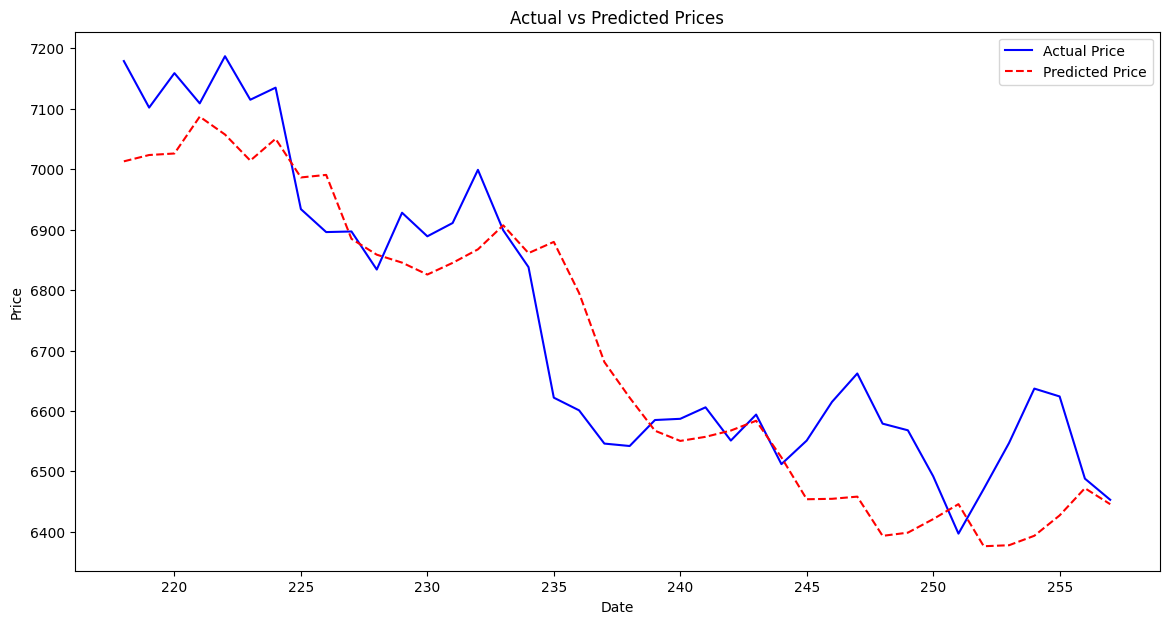

In [71]:
print("Input :", predicted_next_5_days.shape[0], scaled_data.shape[1])

print("predicted_next_5_days :", predicted_next_5_days.shape)
print("scaled_data :", scaled_data.shape)

predicted_next_5_days_reshaped = np.zeros((predicted_next_5_days_new.shape[0], scaled_data.shape[1]))

predicted_next_5_days_reshaped[:, 0] = predicted_next_5_days_new[:, 0]  # Only 'Close' prices are predicted

# Inverse transform the predicted values to original scale
predicted_next_5_days_inversed = scaler.inverse_transform(predicted_next_5_days_reshaped)[:, 0]

print(predicted_next_5_days_inversed)

# Plotting actual vs predicted prices
plt.figure(figsize=(14, 7))

# Plotting the actual prices from the test set
plt.plot(daily_df.index[-len(y_test):], scaler.inverse_transform(np.concatenate([y_test, np.zeros((y_test.shape[0], scaled_data.shape[1] - y_test.shape[1]))], axis=1))[:, 0], color='blue', label='Actual Price')

# Plotting the predicted prices from the test set
test_predictions = model.predict(X_test)
test_predictions_reshaped = np.zeros((test_predictions.shape[0], scaled_data.shape[1]))
test_predictions_reshaped[:, 0] = test_predictions[:, 0]  # Only 'Close' prices are predicted
test_predictions_inversed = scaler.inverse_transform(test_predictions_reshaped)[:, 0]

plt.plot(daily_df.index[-len(test_predictions):], test_predictions_inversed, color='red', linestyle='--', label='Predicted Price')

# Adding titles and labels
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()